In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import earthpy as et 
import earthpy.plot as ep 

sns.set(font_scale=1.5)

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [2]:
ls colorado-flood/spatial/boulder-leehill-rd/outputs

lidar_chm.tif


In [3]:
lidar_chm_path = os.path.join("colorado-flood", "spatial", "boulder-leehill-rd", "outputs", "lidar_chm.tif")

lidar_chm_im = rxr.open_rasterio(lidar_chm_path, masked=True).squeeze()

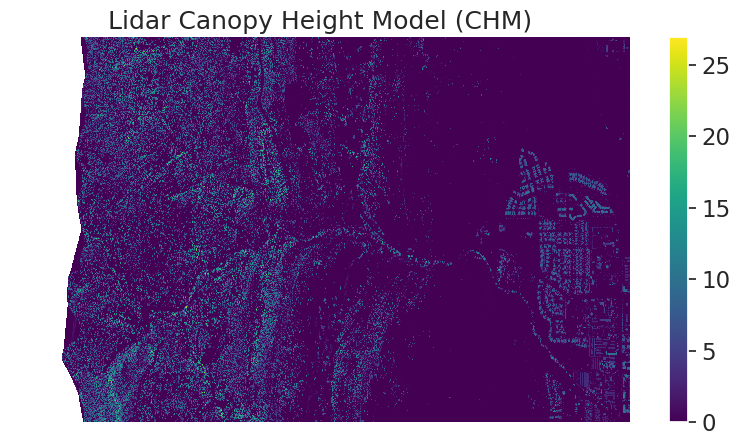

In [4]:

f, ax = plt.subplots(figsize=(10,5))

lidar_chm_im.plot.imshow()

ax.set(title="Lidar Canopy Height Model (CHM)")

ax.set_axis_off()
plt.show()

<Axes: >

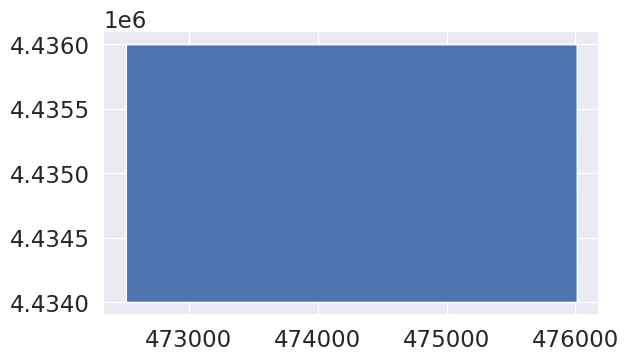

In [5]:
aoi = os.path.join("colorado-flood", "spatial", "boulder-leehill-rd", "clip-extent.shp")

crop_extent = gpd.read_file(aoi)

crop_extent.plot()

In [6]:
crop_extent.crs == lidar_chm_im.rio.crs

True

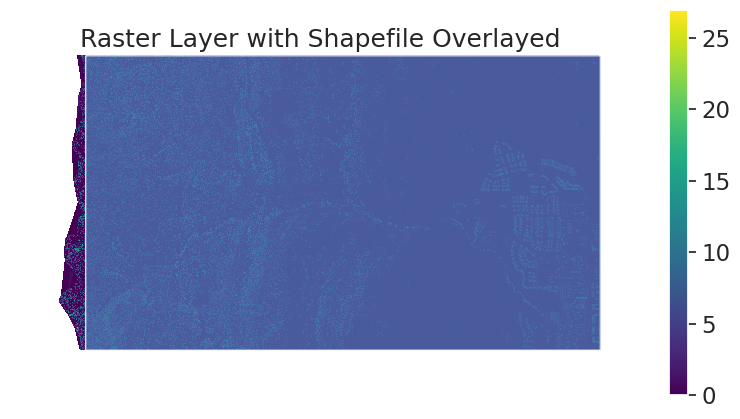

In [7]:
f, ax = plt.subplots(figsize=(10,5))

lidar_chm_im.plot.imshow(ax=ax)

crop_extent.plot(ax=ax, alpha=0.8)

ax.set(title="Raster Layer with Shapefile Overlayed")

ax.set_axis_off()

plt.show()

In [8]:
lidar_clipped = lidar_chm_im.rio.clip(crop_extent.geometry.apply(mapping), crop_extent.crs)

lidar_clipped

<xarray.DataArray (y: 2000, x: 3490)> Size: 56MB
array([[3.72009277, 7.04992676, 7.40002441, ..., 0.        , 0.17004395,
        0.96008301],
       [2.23010254, 2.16992188, 2.15002441, ..., 0.        , 0.09008789,
        1.64001465],
       [7.04003906, 7.47998047, 7.5       , ..., 0.        , 0.        ,
        0.07995605],
       ...,
       [5.56005859, 5.20996094, 5.67993164, ..., 0.        , 0.        ,
        0.        ],
       [3.93005371, 5.70996094, 6.31994629, ..., 0.        , 0.        ,
        0.        ],
       [2.85998535, 5.51000977, 5.51000977, ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
    band         int64 8B 1
  * x            (x) float64 28kB 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  26.930053710938
    STATISTICS_MEAN:     1.4282346808203
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   3.0630422143097
    scale_factor:        1.0
    add_offset:          0.0

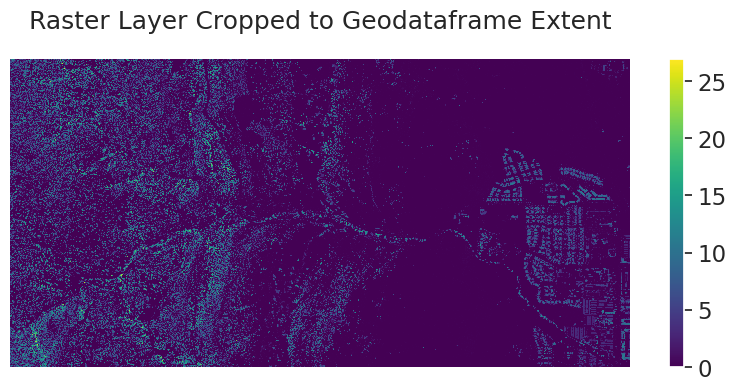

In [9]:
f, ax = plt.subplots(figsize=(10,4))
lidar_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

In [10]:
path_to_tif_file = os.path.join("colorado-flood", "spatial", "outputs", "lidar_chm_cropped.tif")

lidar_clipped.rio.to_raster(path_to_tif_file)

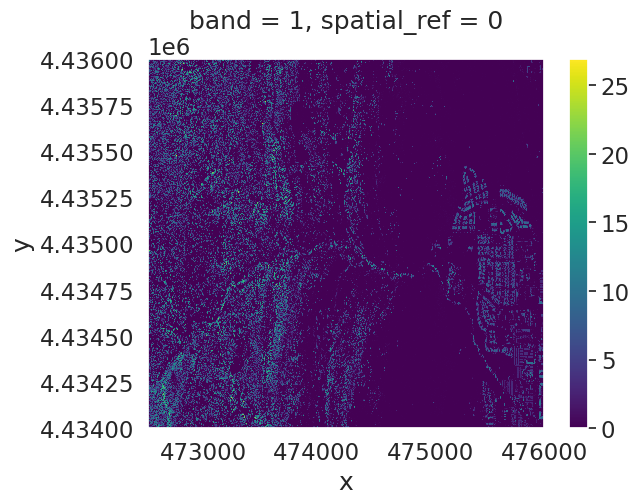

In [11]:

clipped_chm = rxr.open_rasterio(path_to_tif_file)

clipped_chm.plot()